In [1]:
exec(open('init_notebook.py').read())
import dill
from highD.PlotHelper import Histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highD.DataHandler import *

from highD import DataHandler
from highD.ManeuverFilter import FollowType

current working dirC:\Users\abjawad\Documents\GitHub\cogmod-driver-behavior-model\highd_tools


In [2]:

dataset_list = [1]
highD_list = DataHandler.read_dataset(dataset_list)
highD = highD_list[0]

thw_lower_bound=0
thw_upper_bound=4
time_duration=13
distance_threshold=50
follow_type="car-car"

follow_meta = highD.get_vehicle_follow_meta(thw_lower_bound=thw_lower_bound,
                                            thw_upper_bound=thw_upper_bound,
                                            time_duration=time_duration,
                                            distance_threshold=distance_threshold)
follow_meta.columns
car_car = follow_meta[follow_meta['followType'] == FollowType.CAR_CAR]
print(follow_meta.shape)
print(car_car.shape)

(72, 5)
(9, 5)


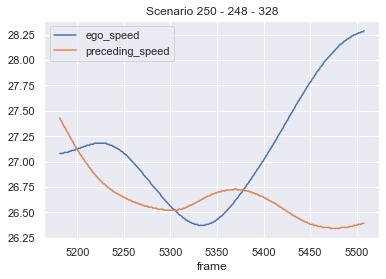

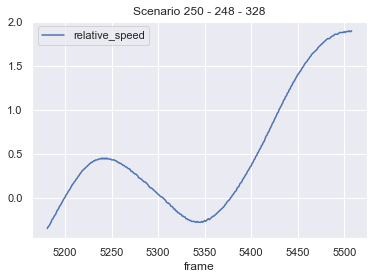

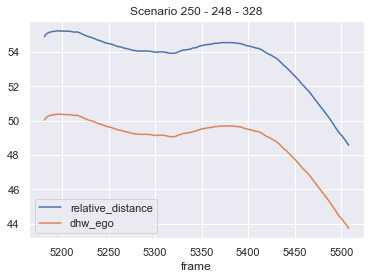

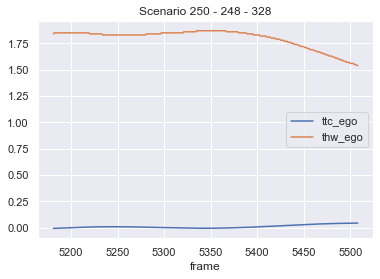

In [3]:
follow_scenario_id = 0
scenario = follow_meta.iloc[follow_scenario_id]
highD.highD_stats.plot_agent_following_scenario(scenario)

In [ ]:
highD.highD_stats.follow_distance_distribution(car_car)

In [ ]:
highD.highD_stats.follow_relative_speed_distribution(car_car)

In [ ]:
highD.highD_stats.follow_speed_distance_ratio(car_car)